# Aprendizaje de maquinas  -- R -- Regresión Logistica
Notas de clase sobre aprendizaje de maquinas usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre regresión logistica usando **R** en el contexto de aprendizaje de maquinas. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

>* [Introducción](#Introducción)
* [Interpretación de los coeficientes en regresión logística](#Interpretación-de-los-coeficientes-en-regresión-logística)
* [Supuestos de regresión logística](#Supuestos-de-regresión-logística)
    * [Aplicación regresión logistica caso: Enfermedades del corazón](#Aplicación-regresión-logistica-caso:-Enfermedades-del-corazón)


**Bibliografía**.

> 

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Introducción

[Contenido](#Contenido)


La regresión logística pertenece a una clase de modelos conocidos como modelos lineales generalizados, estos modelos poseen tres características principales:

1.	Todos ellos implican una combinación lineal de las características de entrada.
2.	Se considera que la salida tiene una distribución de probabilidad subyacente perteneciente a la familia de distribuciones exponenciales (estas incluyen la normal, poisson, binomial).
3.	La media de la distribución de la variable salida está relacionada con la combinación lineal de las variables de entrada por de una función, conocida como función de enlace

Por ejemplo, se puede expresar una combinación lineal de la siguiente manera:

$$ x = \beta_0 + \beta_1 X_1 $$

En la regresión logística,las variables de entradas se escalonan linealmente como se hace con la regresión lineal tradicional, sin embargo, el resultado es utilizado luego como una entrada a la función logística que proporciona una transformación no lineal para la variable de entrada y asegura que el rango de salida se encuentre entre [0,1]. La ecuación de la función logística es la siguiente:

$$ {F}(x) = \frac {e^x}{e^x + 1} =   \frac {e^{-x}}{e^{-x}} \times  \frac {e^x}{(e^x + 1)} = \frac {1}{1 + e^{-x}} $$

Esta función modela la probabilidad de que la variable salida pertenezca a la clase 1 (en el caso clasificación binaria), en lugar de modelar la salida directamente. Como resultado, no se necesita modelar el término de error porque la variable salida, que es una probabilidad, incorpora directamente la aleatoriedad inherente del modelo.

Graficamente la función logística:

<img src="images/logistic.PNG" width=500>

Cuando $x = 0$, la función logística toma el valor 0.5. A medida que $x$ tiende a $+∞$, la función exponencial en el denominador se desvanece y la función se aproxima al valor 1. Cuando $x$ tiende a $-∞$, la función exponencial, y por lo tanto el denominador, tiende hacia infinito y la función se aproxima al valor 0. De esta manera se garantiza que el resultado esté en el intervalo [0,1], que es necesario para que sea una probabilidad.


Utilizando la combinación lineal anterior:

$$ P(Y=1 \mid X) = \frac {e^{\beta_0 + \beta_1 X_1}} {e^{\beta_0 + \beta_1 X_1} +1}  $$

El término a la izquierda refleja que se está calculando la probabilidad de que la variable salida $Y$ pertenezca a la clase 1, basada en la evidencia de ver el valor de la variable de entrada $X$. 

En regresión logística, la distribución de probabilidad subyacente de la variable de  salida $Y$ es la distribución de Bernoulli. Esto es lo mismo que la distribución binomial con un solo ensayo, que se obtiene en un experimento con sólo dos posibles resultados con probabilidad constante, como el lanzamiento de una moneda. La media de la distribución de Bernoulli, $\mu_1$, es la probabilidad del resultado (arbitrariamente elegido) para el éxito, en este caso la clase 1. Consecuentemente, el lado izquierdo en la ecuación anterior es la media de la distribución de salida subyacente. Por esta razón, la función que transforma la combinación lineal de las variables de entrada se conoce como la función media, y esta función es la logística.

Ahora, para determinar la función de enlace para la regresión logística, se realizan algunas manipulaciones algebraicas  con el fin de aislar la combinación lineal de las variables de entrada.


$$ \mu_1 = P(Y=1 \mid X) = \frac {e^{\beta_0 + \beta_1 X_1}} {e^{\beta_0 + \beta_1 X_1} +1}  $$

$$ P(Y=1 \mid X) \cdot (e^{\beta_0 + \beta_1 X_1} +1) = e^{\beta_0 + \beta_1 X_1}   $$

$$ P(Y=1 \mid X)\cdot e^{\beta_0 + \beta_1 X_1} + P(Y=1 \mid X) = e^{\beta_0 + \beta_1 X_1}  $$

$$ P(Y=1 \mid X)  = e^{\beta_0 + \beta_1 X_1} - P(Y=1 \mid X)\cdot e^{\beta_0 + \beta_1 X_1} $$

$$ \frac {P(Y=1 \mid X)} {1-P(Y=1 \mid X)} = e^{\beta_0 + \beta_1 X_1}$$

$$ \ln \Bigg(\frac {P(Y=1 \mid X)} {1-P(Y=1 \mid X)} \Bigg) = \beta_0 + \beta_1 X_1   $$


El término en el lado izquierdo se conoce como *log-odds* o *función logit* y es la función de enlace para la regresión logística. El denominador es la probabilidad de que la salida sea la clase 0 dados los datos de entrada. En consecuencia, esta fracción representa la relación de probabilidad entre la clase 1 y la clase 0, que también se conoce como *odds ratio*.

# Interpretación de los coeficientes en regresión logística

[Contenido](#Contenido)

En la regresión logística, un incremento unitario en la variable $X$ resulta en multiplicar la *odds ratio* por una cantidad, $e^{\beta_i}$. Cuando un coeficiente $\beta$ es positivo, se multiplica la *odds ratio* por un número mayor que 1, por lo que se sabe que el aumento de la característica $X$ aumentará efectivamente la probabilidad de que la salida sea etiquetada como clase 1.

Del mismo modo, el aumento de una varaible con un coeficiente negativo desplaza el equilibrio del modelo hacia una predicción de la clase 0. Finalmente,se debe tener en cuenta que cuando se cambia el valor de una varaible de entrada, el efecto es una multiplicación en la *odds ratio* y no en la salida del modelo en sí.

# Supuestos de regresión logística

[Contenido](#Contenido)

La regresión logística hace menos suposiciones sobre las variables entrada que la regresión lineal. En particular, la transformación no lineal de la función logística significa que se puede modelar relaciones de variables de entrada y salida más complejas. Todavía se tiene una suposición de linealidad, pero en este caso, es entre las variables y las probabilidades logarítmicas. No se cuenta con el supuesto de normalidad para los residuos y tampoco el supuesto de homocedasticidad. Por otro lado, los términos de error aún necesitan ser independientes. Estrictamente hablando, las variables mismas no necesitan ser independientes, pero en la práctica, el modelo de regresión seguirá enfrentándose a problemas si las características muestran un alto grado de multicolinealidad.

> [`glm{stats}`](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html)

In [4]:
library(stats)

En este ejemplo, el archivo "data.dat" contiene tres columnas: los atributos $x_1$ y $x_2$, y la columna $t$ que toma tres valores posibles $\{1, 2, 3\}$. Esta última columna indica la clase a la que pertenece el punto $(x_1, x_2)$. 

In [10]:
## Lectura de datos
archivo  <- "data.dat"
d        <- read.table(archivo, header = TRUE)

attach(d)
head(d)

The following objects are masked from d (pos = 3):

    t, x1, x2

The following objects are masked from d (pos = 4):

    t, x1, x2



x1,x2,t
1.29276441,0.5180493,1
1.35473301,0.5724587,1
0.94534834,1.9434735,1
0.77325141,0.8040903,1
1.30294373,0.5096835,1
0.09102202,1.3436660,1


In [11]:
tail(d)

,x1,x2,t
85,9.728416,-1.2770039,3
86,10.400324,0.3607126,3
87,9.504032,1.8626626,3
88,8.769035,0.3010237,3
89,9.402393,0.1613829,3
90,9.618653,-1.3617843,3


In [12]:
# cuenta cuantas instancias hay por clase.
table(d$t)


 1  2  3 
30 30 30 

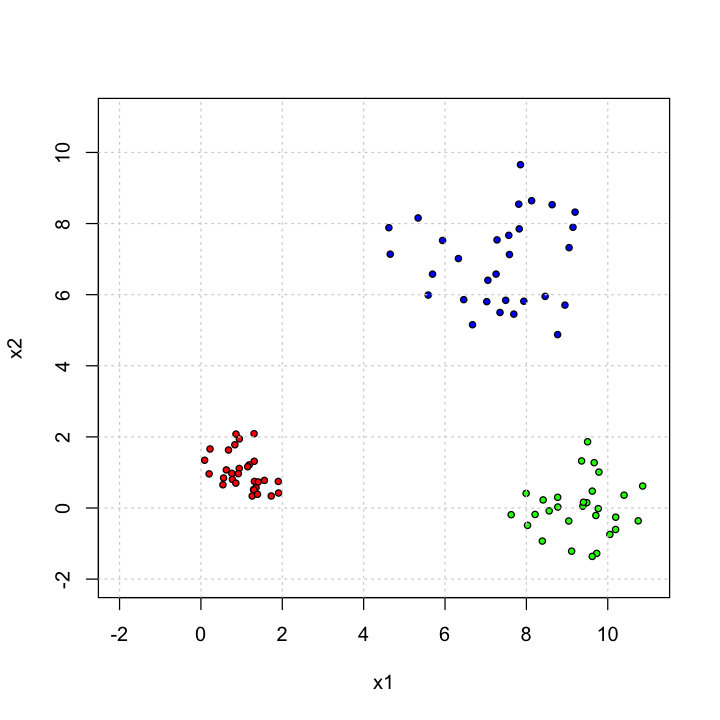

In [13]:
## Grafica del conjunto de datos

options(repr.plot.width=6, repr.plot.height=6)

plot(x1[t == 1], x2[t == 1],                      # Valores pertenecientes a clase 1
     col = 'black',                               # Color puntos clase 1
     type = 'p',                                  # p -- point
     pch = 21,
     bg = 'red', 
     cex = 0.7,   
     xlim = c(-2, 11), ylim = c(-2, 11),          # Limite eje x y eje y de la grafica
     xlab = 'x1', ylab = 'x2')                    # Etiquetas del eje x y el eje y

points(x1[t == 2], x2[t==2],                      # Valores pertenecientes a clase 2
       bg = 'blue',                               # Color puntos clase 2
       pch = 21, 
       cex = 0.7)

points(x1[t == 3], x2[t==3],                      # Valores pertenecientes a clase 3
       bg = 'green',                              # Color puntos clase 3
       pch = 21, 
       cex = 0.7)

grid()                                            # Agrega malla

In [14]:
## Organizar el conjunto de datos en un dataframe

d$C1 <- ifelse(d$t == 1, 1, 0)    # Añadir una columna con valor 1 si t=1, en caso contrario añadir valor cero (0)
d$C2 <- ifelse(d$t == 2, 1, 0)    # Añadir una columna con valor 1 si t=2, en caso contrario añadir valor cero (0)
d$C3 <- ifelse(d$t == 3, 1, 0)    # Añadir una columna con valor 1 si t=3, en caso contrario añadir valor cero (0)

head(d)
tail(d)
attach(d)

x1,x2,t,C1,C2,C3
1.29276441,0.5180493,1,1,0,0
1.35473301,0.5724587,1,1,0,0
0.94534834,1.9434735,1,1,0,0
0.77325141,0.8040903,1,1,0,0
1.30294373,0.5096835,1,1,0,0
0.09102202,1.3436660,1,1,0,0


,x1,x2,t,C1,C2,C3
85,9.728416,-1.2770039,3,0,0,1
86,10.400324,0.3607126,3,0,0,1
87,9.504032,1.8626626,3,0,0,1
88,8.769035,0.3010237,3,0,0,1
89,9.402393,0.1613829,3,0,0,1
90,9.618653,-1.3617843,3,0,0,1


The following objects are masked from d (pos = 3):

    t, x1, x2

The following objects are masked from d (pos = 4):

    t, x1, x2

The following objects are masked from d (pos = 5):

    t, x1, x2



In [15]:
## Estimacion del modelo de clasificación

## Modelo para ajuste clase 1
m.C1 <- glm(C1 ~ x1 + x2,                            # Formula de regresion para clase 1
            data = d,                                # Conjunto de datos
            family = binomial,                       # Tipo de modelo
            control = glm.control(maxit = 100))      # Control del proceso de ajuste

## Modelo para ajuste clase 2
m.C2 <- glm(C2 ~ x1 + x2,                            # Formula de regresion para clase 2
            data = d,                                # Conjunto de datos
            family = binomial,                       # Tipo de modelo 
            control = glm.control(maxit = 100))      # Control del proceso de ajuste

## Modelo para ajuste clase 3
m.C3 <- glm(C3 ~ x1 + x2,                            # Formula de regresion para clase 3
            data = d,                                # Conjunto de datos
            family = binomial,                       # Tipo de modelo
            control = glm.control(maxit = 100))      # Control del proceso de ajuste

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [16]:
## Modelo ajustado para clase 1
print(m.C1)


Call:  glm(formula = C1 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Coefficients:
(Intercept)           x1           x2  
     43.701       -8.887       -3.645  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    114.6 
Residual Deviance: 4.262e-10 	AIC: 6


In [19]:
summary(m.C1)


Call:
glm(formula = C1 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.183e-05  -2.110e-08  -2.110e-08   2.110e-08   8.398e-06  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    43.701  98010.110   0.000        1
x1             -8.887  16493.106  -0.001        1
x2             -3.645  13764.303   0.000        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.1457e+02  on 89  degrees of freedom
Residual deviance: 4.2618e-10  on 87  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 26


In [17]:
## Modelo ajustado para clase 2
print(m.C2)



Call:  glm(formula = C2 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Coefficients:
(Intercept)           x1           x2  
   -59.5063       0.6514      15.8962  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    114.6 
Residual Deviance: 2.364e-10 	AIC: 6


In [20]:
summary(m.C2)


Call:
glm(formula = C2 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.006e-05  -2.110e-08  -2.110e-08   2.110e-08   9.987e-06  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -5.951e+01  1.987e+05       0        1
x1           6.514e-01  2.069e+04       0        1
x2           1.590e+01  3.815e+04       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.1457e+02  on 89  degrees of freedom
Residual deviance: 2.3643e-10  on 87  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 27


In [18]:
## Modelo ajustado para clase 3
print(m.C3)


Call:  glm(formula = C3 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Coefficients:
(Intercept)           x1           x2  
    -36.782        9.007      -13.503  

Degrees of Freedom: 89 Total (i.e. Null);  87 Residual
Null Deviance:	    114.6 
Residual Deviance: 2.462e-10 	AIC: 6


In [21]:
summary(m.C3)


Call:
glm(formula = C3 ~ x1 + x2, family = binomial, data = d, control = glm.control(maxit = 100))

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.030e-05  -2.110e-08  -2.110e-08   2.110e-08   1.026e-05  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)    -36.782 182549.391       0        1
x1               9.007  24432.611       0        1
x2             -13.503  35825.947       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.1457e+02  on 89  degrees of freedom
Residual deviance: 2.4625e-10  on 87  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 27


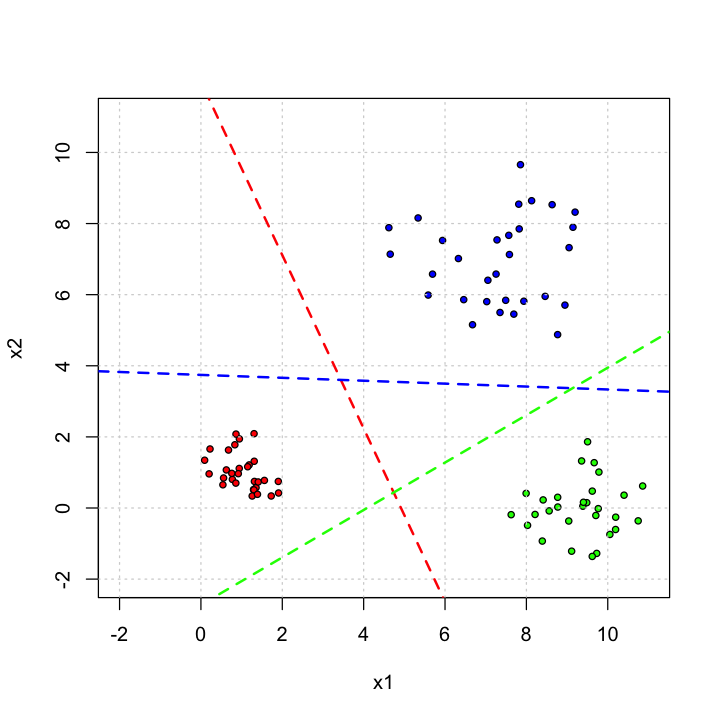

In [25]:
## Grafica de resultados del clasificador

## Grafica Inicial
options(repr.plot.width=6, repr.plot.height=6)

plot(x1[t == 1], x2[t==1],                                      # Valores pertenecientes a clase 1
     col = 'black',                                             # Color puntos clase 1
     type = 'p',                                                # p -- point
     pch = 21,
     bg = 'red', 
     cex = 0.7,   
     xlim = c(-2, 11), ylim = c(-2, 11),                        # Limite eje x y eje y de la grafica
     xlab = 'x1', ylab = 'x2')                                  # Etiquetas del eje x y el eje y

points(x1[t == 2], x2[t==2],                                    # Valores pertenecientes a clase 2
       bg = 'blue',                                             # Color puntos clase 2
       pch = 21, 
       cex = 0.7)

points(x1[t == 3], x2[t==3],                                    # Valores pertenecientes a clase 3
       bg = 'green',                                            # Color puntos clase 3
       pch = 21, 
       cex = 0.7)

grid()                                                          # Agrega malla

## Resultados

abline(a = -m.C1$coefficients[1] / m.C1$coefficients[3],
       b = -m.C1$coefficients[2] / m.C1$coefficients[3],
       lwd = 2, 
       lty = 'dashed', 
       col = 'red', )


abline(a = -m.C2$coefficients[1] / m.C2$coefficients[3],
       b = -m.C2$coefficients[2] / m.C2$coefficients[3], 
       lwd = 2,
       lty = 'dashed', 
       col = 'blue')

abline(a = -m.C3$coefficients[1] / m.C3$coefficients[3],
       b = -m.C3$coefficients[2] / m.C3$coefficients[3], 
       lwd = 2, 
       lty = 'dashed',
       col = 'green')

---


> [` family {stats}`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/family.html) 


**Ejercicio.--**  Utilice el mismo conjunto de datos para realizar el modelo de regresión logistica con los siguientes parametros:

* 70% de los datos para entrenamiento y 30% validación.

* 80% de los datos para entrenamiento y 20% validación.

* Utilice en la función `glm` diferente argumentos para `family` y ajuste diferentes modelos.

¿Que modelos obtuvieron mejor desempeño?

---


## Aplicación regresión logistica caso: Enfermedades del corazón

[Contenido](#Contenido)

> [`factor{base}`](http://stat.ethz.ch/R-manual/R-devel/library/base/html/factor.html)

> [`gml{stats}`](https://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html)

Los datos contienen 270 observaciones para pacientes con potenciales problemas de corazón. De este conjunto, en 120 pacientes se demostró que tienen problemas de corazón. Se buscará predecir si un paciente tiene una enfermedad cardíaca basada en su perfil y una serie de pruebas médicas.

In [29]:
## Instale y cargue las siguientes librerias
library(caret) 
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [32]:
## Lectura de los datos. 
heart <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat",
                   quote="\"")

In [33]:
## Asignación de nombres a las columnas de acuerdo a la web.
names(heart) <- c("AGE", "SEX", "CHESTPAIN", "RESTBP", "CHOL",
                  "SUGAR", "ECG", "MAXHR", "ANGINA", "DEP", 
                  "EXERCISE", "FLUOR","THAL", "OUTPUT")

Tipo y definición de las variables de entrada:

<img src="images/hola.PNG" width=400>

Antes de entrenar un modelo de regresión logística se debe tener en cuenta si es necesario realizar un pre procesamiento de datos. Un error común cuando se trabaja con datos numéricos es la falta de aviso cuando una característica es una variable categórica y no una variable numérica. En el conjunto de datos del corazón, hay cuatro variables de este tipo. Las características de CHESTPAIN, THAL y ECG son características categóricas. La variable EXERCISE, aunque sea una variable categórica ordenada, es sin embargo una variable categórica, por lo que tendrá que ser codificada como un factor también:



In [34]:
## Variables como factor

heart$CHESTPAIN <- factor(heart$CHESTPAIN)
heart$ECG       <- factor(heart$ECG)
heart$THAL      <- factor(heart$THAL)
heart$EXERCISE  <- factor(heart$EXERCISE)

La variable de salida esta clasificada de modo que la clase 1 corresponde a la ausencia de enfermedad cardíaca y la clase 2 corresponde a la presencia de esta. Finalmente se codifica la variable de salida de manera que las etiquetas de clase sean 0 y 1, respectivamente. Esto se hace restando 1 la variable salida:

In [35]:
## Variable salida 0 y 1

heart$OUTPUT <- heart$OUTPUT - 1

In [36]:
## Partición de datos para entrenamiento y prueba (85% y 15%)
set.seed(987954)      # Semilla

## Partición de los datos

heart_sampling_vector <- createDataPartition(heart$OUTPUT,  # datos
                                             p = 0.85,      # Porcentaje de partición de datos
                                             list = FALSE)   


In [37]:
## 230 observaciones para entrenamiento

heart_train        <- heart[heart_sampling_vector,]
heart_train_labels <- heart$OUTPUT[heart_sampling_vector]          # Variable salida entrenamiento

## 40 observaciones para prueba

heart_test         <- heart[-heart_sampling_vector,]               # Tomar datos que no fueron seleccionados para entrenar
heart_test_labels  <- heart$OUTPUT[-heart_sampling_vector]         # Variable salida prueba 

In [38]:
## Modelo de regresion logistica

heart_model <- glm(OUTPUT ~ .,                                     # Variable 'output' vs todas las variables
                   data = heart_train,                             # Fuente de datos
                   family = binomial("logit"))                     # Tipo de modelo

In [39]:
## Resumen del ajuste
summary(heart_model)


Call:
glm(formula = OUTPUT ~ ., family = binomial("logit"), data = heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7137  -0.4421  -0.1382   0.3588   2.8118  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.946051   3.477686  -2.285 0.022321 *  
AGE         -0.020538   0.029580  -0.694 0.487482    
SEX          1.641327   0.656291   2.501 0.012387 *  
CHESTPAIN2   1.308530   1.000913   1.307 0.191098    
CHESTPAIN3   0.560233   0.865114   0.648 0.517255    
CHESTPAIN4   2.356442   0.820521   2.872 0.004080 ** 
RESTBP       0.026588   0.013357   1.991 0.046529 *  
CHOL         0.008105   0.004790   1.692 0.090593 .  
SUGAR       -1.263606   0.732414  -1.725 0.084480 .  
ECG1         1.352751   3.287293   0.412 0.680699    
ECG2         0.563430   0.461872   1.220 0.222509    
MAXHR       -0.013585   0.012873  -1.055 0.291283    
ANGINA       0.999906   0.525996   1.901 0.057305 .  
DEP          0.196349   0.282891  

Debido al hecho de que los modelos de regresión logística son entrenados con el criterio de máxima verosimilitud, se utiliza la distribución normal estándar para realizar pruebas de significación en los coeficientes. Por ejemplo, para reproducir el valor p de la función THAL7 que corresponde al valor z de 3.362, se puede escribir lo siguiente :

In [40]:
## Calculo estadistico z variable THAL 7

pnorm(3.362 , 
      lower.tail = F) * 2  


[1] 0.0007738012

A partir del resumen del modelo, se observa que las variables FLUOR, CHESTPAIN4 y THAL7 son los factores predictivos más fuertes para las enfermedades del corazón. Un número de características de entrada tienen valores de $p$ relativamente altos lo que puede indicar que probablemente no son buenos indicadores de enfermedad cardíaca en presencia de otras características.

Los resultados sugieren que la edad del corazón, por ejemplo, no es un buen indicador para la enfermedad cardíaca; más bien, dice que en presencia de las otras características de entrada, la edad realmente no agrega mucho al modelo. Por otra parte, tenga en cuenta que se tiene un cierto grado de colinealidad en las variables de entrada. El coeficiente de regresión de la edad es negativo pero se puede esperar que la probabilidad de enfermedad cardíaca aumenta con la edad.

In [41]:
## Modelo logistico explicado por edad

heart_model2 <- glm(OUTPUT ~ AGE,                          # Variable 'output' vs todas las variables
                   data = heart_train,                     # Fuente de datos 
                    family =   binomial("logit"))          # Tipo de modelo 

In [42]:
## Resumen modelo solo incluyendo edad

summary(heart_model2)


Call:
glm(formula = OUTPUT ~ AGE, family = binomial("logit"), data = heart_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5027  -1.0691  -0.8435   1.2061   1.6759  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.71136    0.86348  -3.140  0.00169 **
AGE          0.04539    0.01552   2.925  0.00344 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 315.90  on 229  degrees of freedom
Residual deviance: 306.89  on 228  degrees of freedom
AIC: 310.89

Number of Fisher Scoring iterations: 4


Tenga en cuenta que el valor de AIC de este modelo más simple es mayor que lo que se obtuvo con el modelo completo, por lo que se espera que este modelo simple tenga menor rendimiento.

In [44]:
## Rendimiento del modelo

train_predictions       <- predict(heart_model,                      # Modelo obtenido 
                                     newdata = heart_train,          # Datos de entrenamiento
                                       type = "response")

train_class_predictions <- as.numeric(train_predictions > 0.5)       # Valores mayores a 0.5

mean(train_class_predictions == heart_train$OUTPUT)                  # Metrica de precision con la media


[1] 0.8869565

In [45]:
## Prediccion del modelo

test_predictions       <-  predict(heart_model,                      # Modelo
                                    newdata = heart_test,            # COnjunto de datos de prueba
                                     type = "response")

test_class_predictions <-  as.numeric(test_predictions > 0.5)        # Valores predichos mayores a 0.5

mean(test_class_predictions == heart_test$OUTPUT)                    # Precision


[1] 0.775

Las precisiones de clasificación en los conjuntos de entrenamiento y prueba son similares. La resultados de los coeficientes en el modelo  mostró que varias variables no parecen ser significativas, y también existe un grado de colinealidad que significa que ahora se puede proceder con la selección de variables y posiblemente buscar más características, ya sea a través de la computación o la obtención de datos adicionales de los pacientes.

**Regularización LASSO** Se utilizará el paquete `glmnet()` para realizar la regularización que busca eliminar algunas de las variables y evaluar los resultados. En primer lugar, se va a entrenar una serie de modelos regularizados con `glmnet()` y luego se utilizará `cv.glmnet()` para estimar un valor adecuado para $λ$. Luego, se examina  los coeficientes del  modelo regularizado usando este $λ$:

In [46]:
## Definicion de varibles y modelo 

heart_train_mat    <- model.matrix(OUTPUT ~ ., heart_train)[,-1]     # datos de entrenamiento
lambdas            <- 10 ^ seq(8, -4, length = 250)                  # valored para los Lambdas          

heart_models_lasso <- glmnet(heart_train_mat,                        # Modelo
                             heart_train$OUTPUT, alpha = 1, 
                             lambda = lambdas,                       # lambdas para el modelo  
                             family = "binomial")                    # Tipo de modelo  


lasso.cv           <- cv.glmnet(heart_train_mat,                     # datos de entrenamiento
                              heart_train$OUTPUT,                    # salida de los datos de entrenamiento
                              alpha = 1,                      
                              lambda = lambdas,                      # lambdas para el modelo
                              family = "binomial")                   # tipo de modelo 
 
lambda_lasso       <- lasso.cv$lambda.min                            # lambda estimado
lambda_lasso


predict(heart_models_lasso,                                          # predicion del modelo con lambda estimado
        type = "coefficients", 
        s = lambda_lasso)

[1] 0.01181107

19 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -4.702476656
AGE          .          
SEX          0.982354604
CHESTPAIN2   0.050583269
CHESTPAIN3   .          
CHESTPAIN4   1.481502102
RESTBP       0.012612051
CHOL         0.003912907
SUGAR       -0.536400517
ECG1         .          
ECG2         0.321026773
MAXHR       -0.010563953
ANGINA       0.795431862
DEP          0.213059195
EXERCISE2    0.320076517
EXERCISE3    0.012296570
FLUOR        0.925047313
THAL6        0.066580841
THAL7        1.484011300

Se observa que algunas variables de han sido eliminadas del modelo porque sus coeficientes son cero. Si ahora se utiliza este modelo para medir la exactitud de clasificación en los conjuntos de entrenamiento y prueba, se puede esperar en ambos casos un rendimiento ligeramente mejor.

In [47]:
## Auste y predicción del modelo con la regularización lasso

lasso_train_predictions       <- predict(heart_models_lasso, 
                                           s = lambda_lasso, 
                                           newx = heart_train_mat,
                                           type = "response")

lasso_train_class_predictions <- as.numeric(lasso_train_predictions > 0.5)

mean(lasso_train_class_predictions == heart_train$OUTPUT)                    # Porcentaje de acierto entrenamiento

heart_test_mat                <- model.matrix(OUTPUT ~ ., 
                                              heart_test)[,-1]

lasso_test_predictions       <- predict(heart_models_lasso,  
                                          s = lambda_lasso, 
                                          newx = heart_test_mat,
                                          type = "response")

lasso_test_class_predictions <- as.numeric(lasso_test_predictions > 0.5)

mean(lasso_test_class_predictions == heart_test$OUTPUT)                       # Porcentaje de acierto predicción


[1] 0.8913043

[1] 0.775

---


**Ejercicio.--** El conjunto de datos llamado ***dataRL.txt*** contiene información sobre los sobrevivientes del Titanic.
Construya un modelo de regresión logistica donde tilice la variable binaria **Survived** contra las otras variables para predecir con estas caracteristicas si hubo o no sobreviviente. Una vez construido el modelo extraiga variables del modelo para buscar un mejor rendimiento de este y/o realice el proceso de regularización.

Utilice un 70% de los datos para ajuste y 30% para validación del modelo.

---


[Contenido](#Contenido)
